In [1]:
%matplotlib TkAgg
import mne
import numpy as np

Channels marked as bad:
none


In [2]:
kmeans = np.load('G:/My Drive/NeuroResearch/Data/eegCompress/processedData/kmeansSVD001.npz')
centers = kmeans['arr_0'].transpose()
indices = kmeans['arr_1'].squeeze()
start = kmeans['arr_2']

cols = len(indices)
print(centers.shape, indices.shape, start.shape)

(19, 1024) (1100366,) (19,)


In [3]:
reconstruct = np.zeros((len(start), cols + 1))
reconstruct[:,0] = start

for i in range(0,cols):
    reconstruct[:,i + 1] = reconstruct[:, i] + centers[:, indices[i]]

print(reconstruct.shape)

(19, 1100367)


Creating RawArray with float64 data, n_channels=19, n_times=1100367
    Range : 0 ... 1100366 =      0.000 ...  4298.305 secs
Ready.
Using matplotlib as 2D backend.


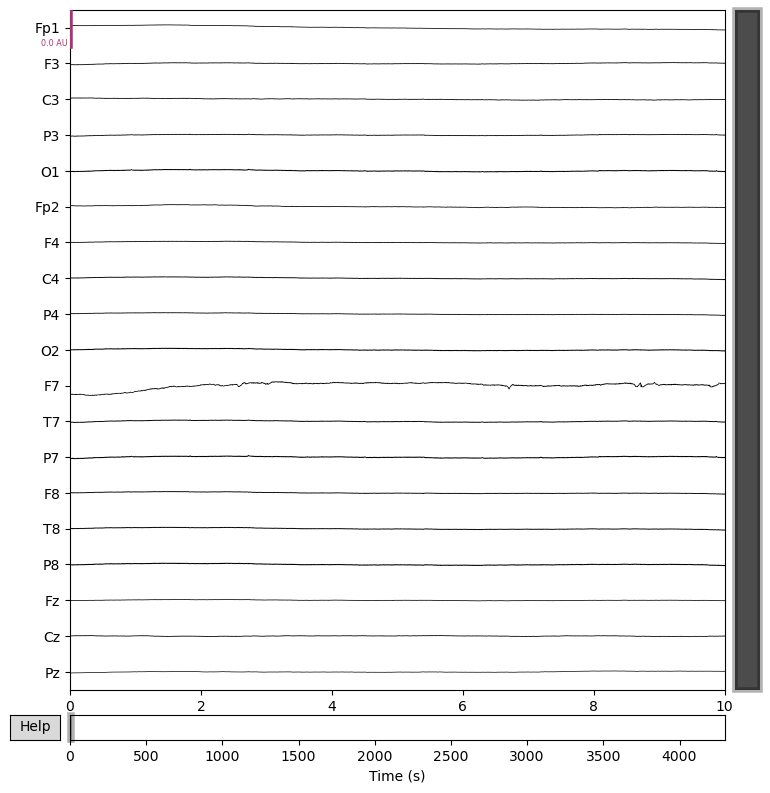

In [4]:
goodChannels = ['Fp1','F3','C3','P3','O1','Fp2','F4','C4','P4','O2','F7','T7','P7','F8','T8','P8','Fz','Cz','Pz']

info = mne.create_info(goodChannels, 256)
tempRaw = mne.io.RawArray(reconstruct, info)
tempRaw.plot()

In [7]:
np.min(reconstruct), np.max(reconstruct)

(np.float64(-0.0011173209886466016), np.float64(0.001802546819123737))